In [0]:
import os
import zipfile

In [3]:
local_zip = '/content/images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/content/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

ant_dir = os.path.join('/tmp/images/ant')
eater_dir = os.path.join('/tmp/images/anteater')


print('total training ant:', len(os.listdir(ant_dir)))
print('total training anteater:', len(os.listdir(eater_dir)))

ant_files = os.listdir(ant_dir)
print(ant_files[:10])

eater_files = os.listdir(eater_dir)
print(eater_files[:10])

total training ant: 28
total training anteater: 26
['download (4).jpg', 'images (7).jpg', 'images (9).jpg', 'download (2).jpg', 'download (8).jpg', 'images (10).jpg', 'download (1).jpg', 'images (6).jpg', 'images.png', 'download (3).jpg']
['download (4).jpg', 'images (7).jpg', 'images (9).jpg', 'download (2).jpg', 'download (14).jpg', 'download (8).jpg', 'download (1).jpg', 'download (13).jpg', 'images (6).jpg', 'download (15).jpg']


In [5]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/images/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=180,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='binary',
  shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='binary',
  shuffle=False
)

print(train_generator.class_indices)

Found 54 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
{'ant': 0, 'anteater': 1}


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=25, 
                              validation_data = validation_generator, 
                              verbose = 1, steps_per_epoch = 8)




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 165888)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 165888)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

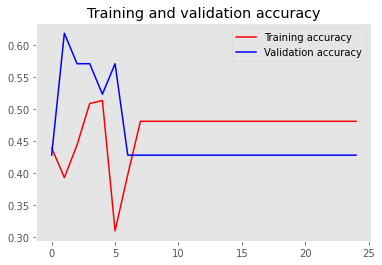

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.grid()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

Saving download (8).jpg to download (8).jpg
[[1]]
anteater


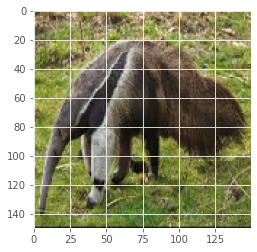

In [10]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  plt.imshow(img)

  images = np.vstack([x])
  classes = model.predict_classes(images)
  print(classes)
  if classes[0] == 1:
    print('anteater')
  else:
    print('ant')
